### Mediapipe Documentation: https://ai.google.dev/edge/mediapipe/solutions/guide ### 

## 0. Setup and Imports ##

In [ ]:
%pip install mediapipe opencv-python

In [1]:
from workouts import *

In [ ]:
track_shoulder_presses(video_source=0)  # Change video_source if neccessary

In [3]:
# Run the tracker on a prerecorded video
track_shoulder_presses_on_video("dumbbelloverheadshoulderpress_S3_FL.mp4", "dumbbell_overhead_shoulder_press_output.mp4", "shoulder_press.csv")

C:\Users\dougl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Failed to grab frame.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
df = pd.read_csv("shoulder_press.csv")

# Show the first few rows of the data
df.head()

,Frame,Time,Left_Shoulder_X,Left_Shoulder_Y,Left_Elbow_X,Left_Elbow_Y,Left_Wrist_X,Left_Wrist_Y,Right_Shoulder_X,Right_Shoulder_Y,Right_Elbow_X,Right_Elbow_Y,Right_Wrist_X,Right_Wrist_Y,Left_Angle,Right_Angle,Left_Wrist_Y.1,Right_Wrist_Y.1,Left_State,Right_State
0,0,0.00,535.009986,276.132023,551.255375,340.254173,559.598708,401.610455,454.001749,275.208163,445.644817,338.751599,427.661678,393.828911,173.526896,169.410038,401.610455,393.828911,RESTING,RESTING
1,1,0.02,535.010844,275.851491,551.259989,340.220028,559.573925,401.750520,454.004699,275.309256,445.718363,338.657615,427.773473,393.711108,173.527167,169.404390,401.750520,393.711108,RESTING,RESTING
2,2,0.04,535.010523,275.694501,551.271898,340.218151,559.552199,401.921618,454.007703,275.437519,445.816505,338.611400,427.908924,393.518659,173.517419,169.377753,401.921618,393.518659,RESTING,RESTING
3,3,0.06,535.008377,275.547060,551.282948,340.198517,559.529346,402.006295,454.017305,275.510582,445.951849,338.542843,428.007254,393.380338,173.505601,169.326325,402.006295,393.380338,RESTING,RESTING
4,4,0.08,535.006338,275.381917,551.290512,340.173921,559.514916,402.067798,454.022992,275.547892,446.047121,338.483807,428.086728,393.256313,173.496707,169.274623,402.067798,393.256313,RESTING,RESTING


In [4]:
# Get summary statistics of the data
df.describe()

# Get information about the data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Frame             927 non-null    int64  
 1   Time              927 non-null    float64
 2   Left_Shoulder_X   927 non-null    float64
 3   Left_Shoulder_Y   927 non-null    float64
 4   Left_Elbow_X      927 non-null    float64
 5   Left_Elbow_Y      927 non-null    float64
 6   Left_Wrist_X      927 non-null    float64
 7   Left_Wrist_Y      927 non-null    float64
 8   Right_Shoulder_X  927 non-null    float64
 9   Right_Shoulder_Y  927 non-null    float64
 10  Right_Elbow_X     927 non-null    float64
 11  Right_Elbow_Y     927 non-null    float64
 12  Right_Wrist_X     927 non-null    float64
 13  Right_Wrist_Y     927 non-null    float64
 14  Left_Angle        927 non-null    float64
 15  Right_Angle       927 non-null    float64
 16  Left_Wrist_Y.1    927 non-null    float64
 1

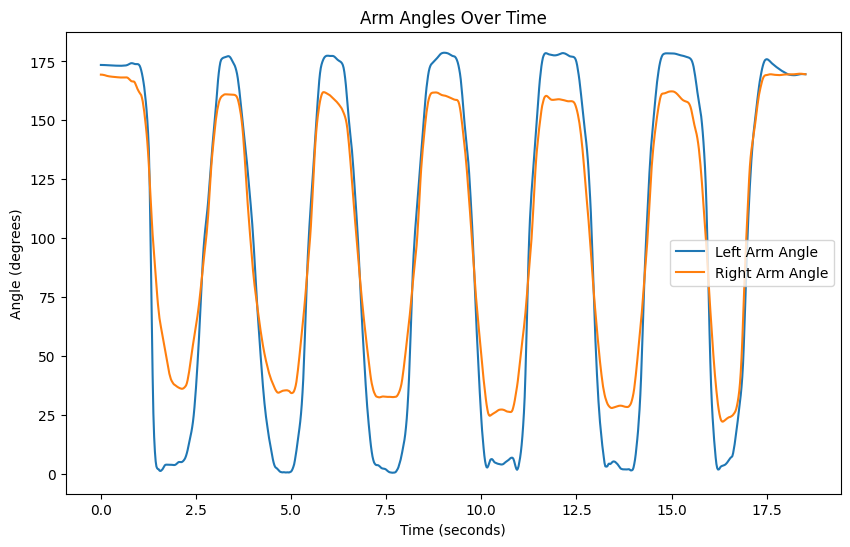

In [5]:
# Plot the angles for the left and right arms over time
plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Left_Angle'], label='Left Arm Angle')
plt.plot(df['Time'], df['Right_Angle'], label='Right Arm Angle')
plt.xlabel('Time (seconds)')
plt.ylabel('Angle (degrees)')
plt.title('Arm Angles Over Time')
plt.legend()
plt.show()

C:\Users\dougl\AppData\Local\Temp\ipykernel_2712\1396628508.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  time_grouped = df.groupby('Time_Binned').mean()


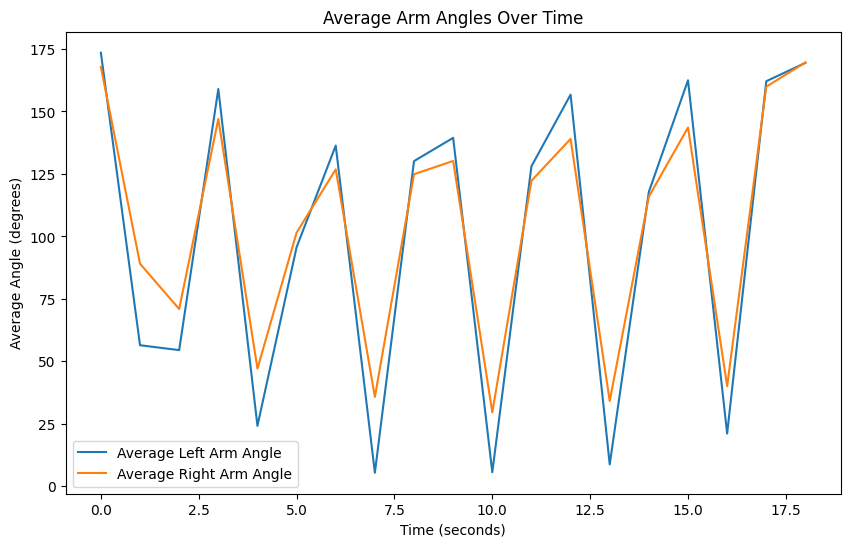

In [7]:
# Aggregate data by time intervals (e.g., 1-second bins)
df['Time_Binned'] = (df['Time'] // 1).astype(int)
time_grouped = df.groupby('Time_Binned').mean()

# Plot average angles over time
plt.figure(figsize=(10, 6))
plt.plot(time_grouped.index, time_grouped['Left_Angle'], label='Average Left Arm Angle')
plt.plot(time_grouped.index, time_grouped['Right_Angle'], label='Average Right Arm Angle')
plt.xlabel('Time (seconds)')
plt.ylabel('Average Angle (degrees)')
plt.title('Average Arm Angles Over Time')
plt.legend()
plt.show()